# Lab 4.07 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 7 - Digimeter sample

Every year, Imec (formerly iMinds) carries out a study on the use of digital technologies in Flanders, the Digimeter (Vanhaelewyn & De Marez, 2016). In this exercise we will check whether the sample of the Digimeter 2016 (n = 2164) is representative of the population in terms of the age categories of the participants.

You can find the frequency tables in the following data files:

- `data/leeftijden-digimeter.csv`: relative frequencies of the age of participants in the iMec Digimeter 2016 and the Flemish population (as reported in the Digimeter publication)
- `data/leeftijden-bestat-vl.csv`: absolute frequencies for the different age categories of the Flemish population (Source: BelStat, <https://bestat.economie.fgov.be/bestat/> , C01.1: Population by place of residence (province), sex, position in the household (C), marital status and age (B)).  


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.
2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate this.
3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.
4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?

Results of the main calculations (rounded up to 3 decimal places):

- χ² ≈ 6.700 (df = 6),
- g ≈ 12.592,
- p ≈ 0.350

Read the dataset `data/leeftijden-digimeter.csv`  
Make sure the Percentages are actually percentages.


In [2]:
df_digi = pd.read_csv("./../data/leeftijden-digimeter.csv")
df_digi.head()

,Leeftijdsgroep,Percentage
0,15-19,6.6
1,20-29,14.2
2,30-39,15.0
3,40-49,16.3
4,50-59,17.3


Read the dataset `leeftijden-bestat-vl.csv`

In [3]:
df_pop = pd.read_csv("./../data/leeftijden-bestat-vl.csv")
df_pop.head()

,age.group,population
0,0-5,352017
1,5-9,330320
2,10-14,341303
3,15-19,366648
4,20-24,375469


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.

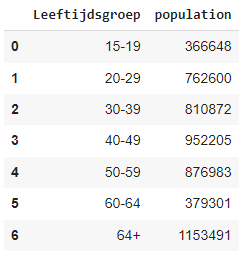

In [4]:
df_pop = df_pop[(df_pop['age.group'] != '0-5') &
                (df_pop['age.group'] != '5-9') &
                (df_pop['age.group'] != '10-14')]
df_pop.head()

,age.group,population
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587


2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate these.  
Answer = [142.824 307.288 324.6   352.732 374.372 157.972 502.048]

In [5]:
d = {'15-19': '15-19', '20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39', '40-44': '40-49', '45-49': '40-49', '50-54': '50-59', '55-59': '50-59', '60-64': '60-64' }

df_pop['leeftijdsgroep'] = df_pop['age.group'].map(d).fillna('64+') 
df_pop.head()

,age.group,population,leeftijdsgroep
3,15-19,366648,15-19
4,20-24,375469,20-29
5,25-29,387131,20-29
6,30-34,401285,30-39
7,35-39,409587,30-39


3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.  
Answer = [0.06915147 0.1438298  0.15293412 0.17959016 0.16540295 0.07153788
 0.21755361]

In [6]:
df_pop = df_pop.groupby(['leeftijdsgroep'])['population'].sum().reset_index()
df_pop.head()

,leeftijdsgroep,population
0,15-19,366648
1,20-29,762600
2,30-39,810872
3,40-49,952205
4,50-59,876983


4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?  

Results of the main calculations (rounded up to 3 decimal places):

χ² ≈ 6.700 (df = 6),
g ≈ 12.592,
p ≈ 0.350

In [7]:
n= 2167
observed = (df_digi['Percentage'] * n) /100
observed

0    143.022
1    307.714
2    325.050
3    353.221
4    374.891
5    158.191
6    502.744
Name: Percentage, dtype: float64

In [8]:
df_pop['expected_p'] = df_pop['population'] / df_pop['population'].sum()
df_pop.head()

,leeftijdsgroep,population,expected_p
0,15-19,366648,0.069151
1,20-29,762600,0.143830
2,30-39,810872,0.152934
3,40-49,952205,0.179590
4,50-59,876983,0.165403


In [9]:
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = df_pop['expected_p'] * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 2164
k = 7; df = 6
Chi-squared        χ² = 6.7090
Critical value      g = 12.5916
p-value             p = 0.3486


## Conclusie

$\chi^2$ is kleiner dan de kritische waarde \
p value = 34.86% >> 5% \
=> de steekproef van Imec is representatief voor vlaamse bevolkin 

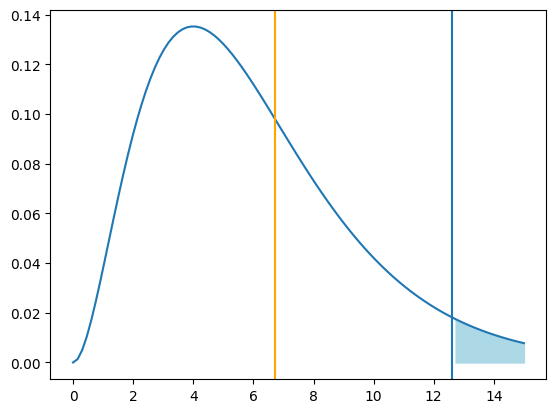

In [10]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)
fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
  color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange'); # chi-squared